In [4]:
import csv
from collections import defaultdict
import cv2
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import random

In [6]:
def iou(box1, box2):
    """
    Function that calculates intersection over union ratio given two bounding boxes
    input:
        box1, box2: bounding boxes (BB) as tuples in the form (x,y,w,h)
                    where (x,y) are the top left corner coordinates, and (w,h) are the widht and height of the BB
    output: intersection over union ratio
    """
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2
    w_intersection = min(x1 + w1, x2 + w2) - max(x1, x2)
    h_intersection = min(y1 + h1, y2 + h2) - max(y1, y2)
    if (w_intersection <= 0) or (h_intersection) <= 0: # no overlap
        return 0
    I = w_intersection * h_intersection # rectangle area (b * h)
    U = (w1 * h1) + (w2 * h2) - I # union = area - intersection
    return I / U

In [7]:
def non_maximum_suppression(boxes, scores, threshold):
    """
    Function that filter noisy bounding boxes by non-maximum suppresion method
    input:
        boxes: bounding boxes (BB) list. List of tuples in the form (x,y,w,h) 
               where (x,y) are the top left corner coordinates, and (w,h) are the widht and height of the BB
        scores: detection scores list
        threshold: overlapping threshold for supression
    ouput:
        D: final detections (BBs) list
    """
    D = list()
    ret_scores = list()
    while boxes:
        max_idx = np.argmax(scores) # get max score index
        m = scores[max_idx] # get max score
        M = boxes[max_idx] # get the BB with the max score
        ret_scores.append(m)
        D.append(M) # store the BB with max detection score as final detection candidate
        del boxes[max_idx] # remove the BB from the list
        del scores[max_idx] # remove score from the list
        for idx, box in enumerate(boxes): # iterate over the other boxes to filter out BB that overlaps the most
            if iou(M,box) >= threshold:
                del boxes[idx]
                del scores[idx]
    return D, ret_scores

In [8]:
def get_random_corner(sample_shape, img_shape):
    
    '''
    description: Returns a point in the image. As the point is going to be used as sample top-left corner, the function
    also checks if the final sample is crossing the boundaries. If so, re-calculates the point.
    input:
        - sample_shape: list
        - img_shape: list
    output:
        - corner: list
    '''
    
    ylimit = img_shape[0]
    xlimit = img_shape[1]
    
    corner = [random.randint(0, ylimit), random.randint(0, xlimit)]
    
    ycheck = (corner[0] + sample_shape[0]) <= ylimit
    xcheck = (corner[1] + sample_shape[1]) <= xlimit
    
    while ((not ycheck) or (not xcheck)):
        corner = get_random_corner(sample_shape, img_shape)
        ycheck = (corner[0] + sample_shape[0]) <= ylimit
        xcheck = (corner[1] + sample_shape[1]) <= xlimit
    
    score = round(random.random(),2)
    coords = (corner[0], corner[1], sample_shape[0], sample_shape[1], score)
    
    return coords

#### Generate random bounding boxes and scores

In [9]:
shapes = []
img_shape = [50,50]
for i in range(random.randint(5,10)):
    shapes.append([random.randint(0,img_shape[0]), random.randint(0,img_shape[1])])
bbs = []
scores = []
for shape in shapes:
    bb = get_random_corner(shape, img_shape)
    score = bb[4]
    bb = (bb[0],bb[1],bb[2],bb[3])    
    bbs.append(bb)
    scores.append(score)

#### Create empty image

In [10]:
img_before = np.zeros((img_shape[0]+10, img_shape[1]+10, 3), dtype = "uint8")

#### Plot bounding boxes

In [11]:
for idx, bb in enumerate(bbs):
    x, y, w, h = bb    
    cv2.rectangle(img_before, (x, y), (x+w, y+h), (0, 255, 0), 1)

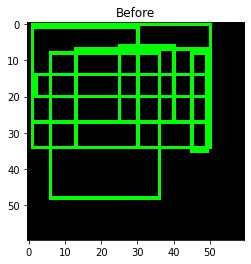

In [12]:
plt.title("Before")
plt.imshow(img_before)
#plt.clf()

#### Apply NMS

In [13]:
D, ret_scores = non_maximum_suppression(bbs, scores, 0.2)

#### Plot final detections

In [14]:
img_after = np.zeros((img_shape[0]+10, img_shape[1]+10, 3), dtype = "uint8")

In [15]:
for bb in D:
    x, y, w, h = bb    
    cv2.rectangle(img_after, (x, y), (x+w, y+h), (0, 255, 0), 1)

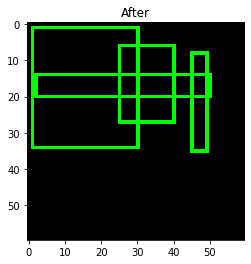

In [16]:
plt.title("After")
plt.imshow(img_after)